In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
color = sns.color_palette()
%matplotlib inline
matplotlib.style.use('ggplot')

plt.rcParams['figure.figsize'] = [12, 6]

from datetime import timedelta
import datetime as dt

from IPython.display import display

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from conf.configure import Configure
from utils import dataframe_util

In [3]:
df_train = pd.read_csv(Configure.original_train_path)
df_test = pd.read_csv(Configure.original_test_path)

In [4]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
dataframe_util.contains_null(df_train)

,column_name,missing_count,missing_rate


In [8]:
dataframe_util.contains_null(df_test)

,column_name,missing_count,missing_rate


In [9]:
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [10]:
type(df_train['pickup_datetime'][0])

str

In [11]:
def generate_date_features(train, test):
    # 2016-03-14 17:24:55
    train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
    train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])
    test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
    # date
    train.loc[:, 'pickup_date'] = train['pickup_datetime'].dt.date
    test.loc[:, 'pickup_date'] = test['pickup_datetime'].dt.date
    # month
    train['pickup_month'] = train['pickup_datetime'].dt.month
    test['pickup_month'] = train['pickup_datetime'].dt.month
    # day
    train['pickup_day'] = train['pickup_datetime'].dt.day
    test['pickup_day'] = train['pickup_datetime'].dt.day
    # hour
    train['pickup_hour'] = train['pickup_datetime'].dt.hour
    test['pickup_hour'] = train['pickup_datetime'].dt.hour
    # weekofyear
    train['pickup_weekofyear'] = train['pickup_datetime'].dt.weekofyear
    test['pickup_weekofyear'] = train['pickup_datetime'].dt.weekofyear
    # dayofweek
    train['pickup_dayofweek'] = train['pickup_datetime'].dt.dayofweek
    test['pickup_dayofweek'] = train['pickup_datetime'].dt.dayofweek

    train.drop(['dropoff_datetime'], axis=1, inplace=True)

In [12]:
generate_date_features(df_train, df_test)

In [13]:
df_train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_month,pickup_day,pickup_hour,pickup_weekofyear,pickup_dayofweek
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,3,14,17,11,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,6,12,0,23,6
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,1,19,11,3,1
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,4,6,19,14,2
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,3,26,13,12,5


In [14]:
df_train['trip_duration'].max() // 3600, df_train['trip_duration'].min()

(979, 1)

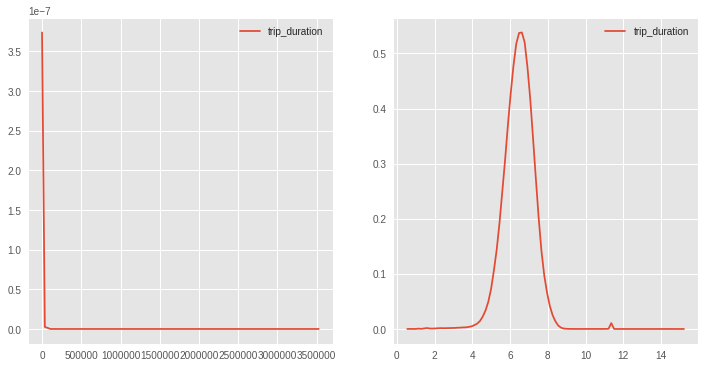

In [15]:
plt.subplot(121)
sns.kdeplot(df_train['trip_duration'])
plt.subplot(122)
sns.kdeplot(np.log1p(df_train['trip_duration']))

可以看出乘车时间最大值为 979 小时, 最小值为 1 秒, 将这些 outlier 数据进行 log 处理

In [16]:
print '小于等于 1s:', sum(df_train['trip_duration'] <= 1)
print '小于等于 10s:', sum(df_train['trip_duration'] <= 10)
print '大于 100 h:', sum(df_train['trip_duration'] > 100*3600)

小于等于 1s: 33
小于等于 10s: 2166
大于 100 h: 4


**训练集和测试集划分策略**

**时间角度**

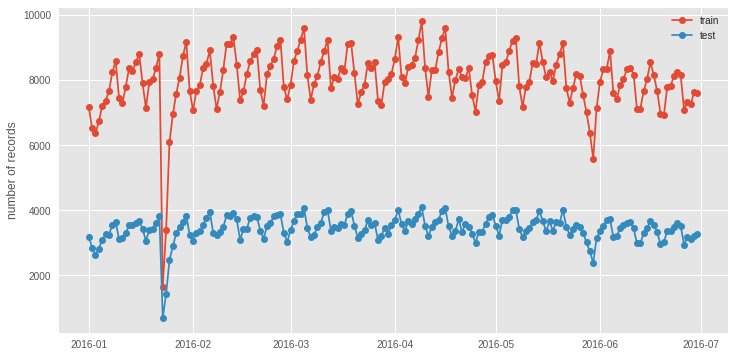

In [17]:
plt.plot(df_train.groupby(['pickup_date']).count()['id'], 'o-', label='train')
plt.plot(df_test.groupby(['pickup_date']).count()['id'], 'o-', label='test')
plt.legend(loc=0)
plt.ylabel('number of records')

**空间角度**

In [18]:
longs = df_train['pickup_longitude'].values.tolist()
longs.extend(df_test['pickup_longitude'].values.tolist())

latis = df_train['pickup_latitude'].values.tolist()
latis.extend(df_test['pickup_latitude'].values.tolist())

In [19]:
city_border_longitude = [min(longs), max(longs)]
city_border_latitude = [min(latis), max(latis)]

In [20]:
city_border_longitude, city_border_latitude

([-121.93334197998048, -61.33552932739258],
 [34.359695434570305, 51.88108444213867])

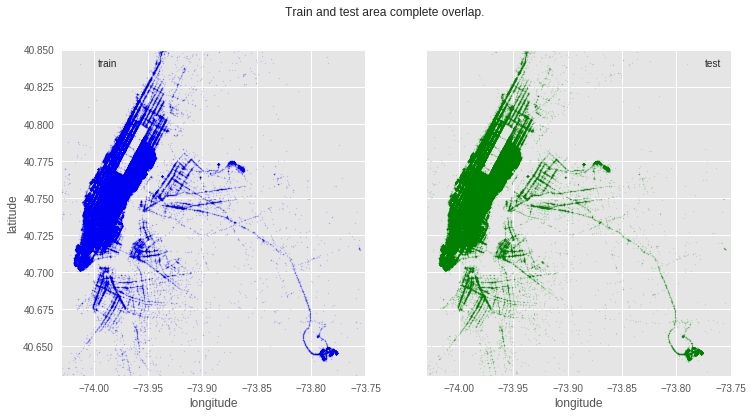

In [21]:
N = df_test.shape[0]
city_border_longitude = (-74.03, -73.75)
city_border_latitude = (40.63, 40.85)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(df_train['pickup_longitude'].values[:N], df_train['pickup_latitude'].values[:N],
              color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(df_test['pickup_longitude'].values[:N], df_test['pickup_latitude'].values[:N],
              color='green', s=1, label='test', alpha=0.1)
fig.suptitle('Train and test area complete overlap.')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.ylim(city_border_latitude)
plt.xlim(city_border_longitude)
plt.show()

从时间角度和空间角度可以看出, 训练集和测试集的时间分布基本一致, 按照时间随机划分数据集, 那么构造验证集时, 可考虑在**每天内随机选取数据集**.

In this case the train and test split seems to be random. This allows us to use unsupervised learning and feature extraction to be applied on the full data set.

vendor_id 字段

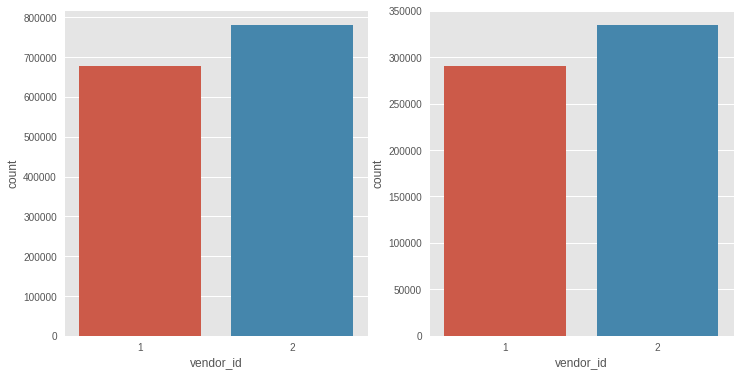

In [22]:
plt.subplot(121)
sns.countplot(df_train['vendor_id'])
plt.subplot(122)
sns.countplot(df_test['vendor_id'])

passenger_count

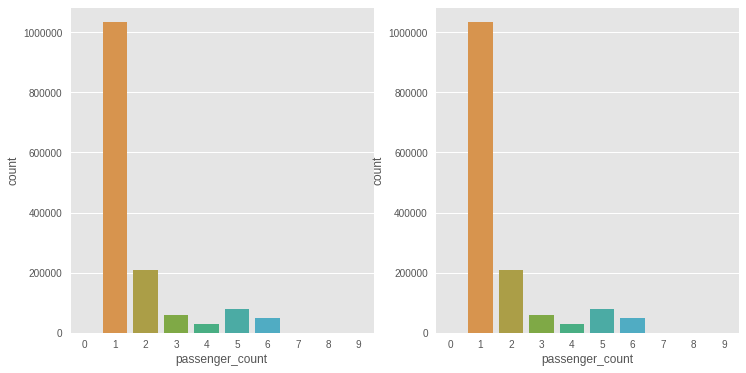

In [23]:
plt.subplot(121)
sns.countplot(df_train['passenger_count'])
plt.subplot(122)
sns.countplot(df_train['passenger_count'])

store_and_fwd_flag

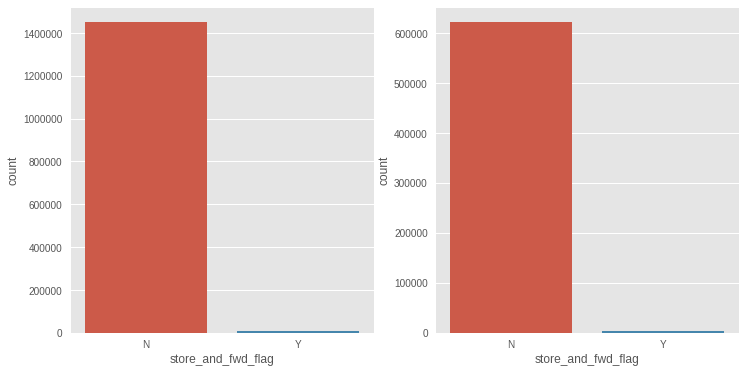

In [24]:
plt.subplot(121)
sns.countplot(df_train['store_and_fwd_flag'])
plt.subplot(122)
sns.countplot(df_test['store_and_fwd_flag'])

In [25]:
display(df_train.head(2))
display(df_test.head(2))

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_month,pickup_day,pickup_hour,pickup_weekofyear,pickup_dayofweek
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,3,14,17,11,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,6,12,0,23,6


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,pickup_month,pickup_day,pickup_hour,pickup_weekofyear,pickup_dayofweek
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2016-06-30,3,14,17,11,0
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2016-06-30,6,12,0,23,6


month vs trip_duration

In [26]:
month_trip_duration = df_train.groupby(['pickup_month'])['trip_duration'].mean().reset_index()

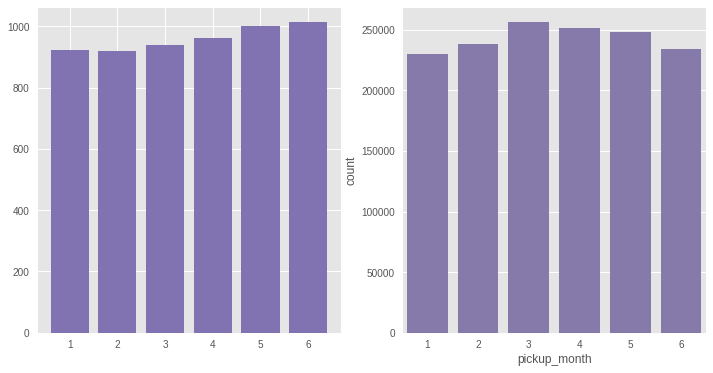

In [27]:
plt.subplot(121)
plt.bar(month_trip_duration['pickup_month'], month_trip_duration['trip_duration'], color=color[3])
plt.subplot(122)
sns.countplot(df_train['pickup_month'], color=color[3])

可以看出,月份 1- 6 trip_duration 逐渐变大, 可能和天气变暖有关.

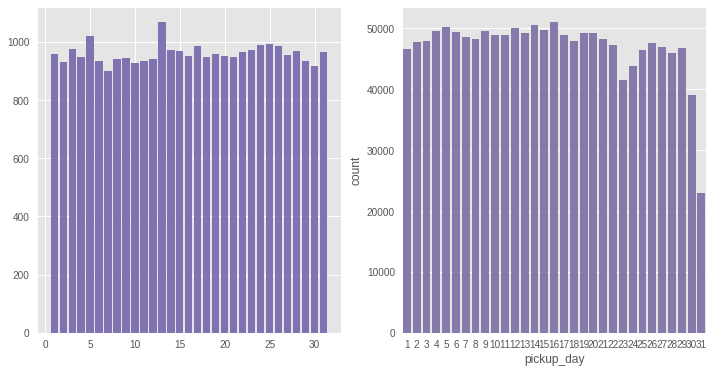

In [28]:
day_trip_duration = df_train.groupby(['pickup_day'])['trip_duration'].mean().reset_index()
plt.subplot(121)
plt.bar(day_trip_duration['pickup_day'], day_trip_duration['trip_duration'], color=color[3])
plt.subplot(122)
sns.countplot(df_train['pickup_day'], color=color[3])

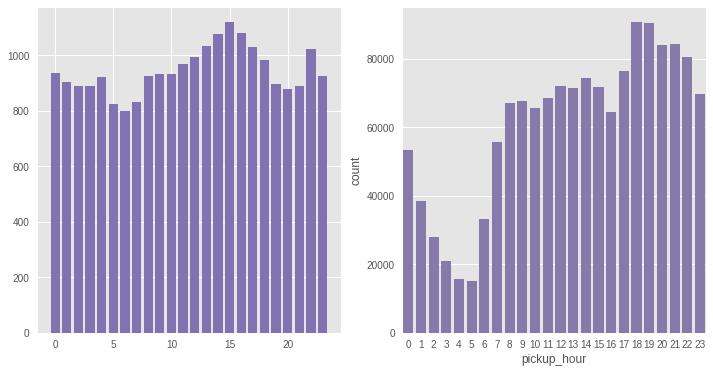

In [29]:
hour_trip_duration = df_train.groupby(['pickup_hour'])['trip_duration'].mean().reset_index()
plt.subplot(121)
plt.bar(hour_trip_duration['pickup_hour'], hour_trip_duration['trip_duration'], color=color[3])
plt.subplot(122)
sns.countplot(df_train['pickup_hour'], color=color[3])

可以看出,凌晨乘车数量逐渐减小

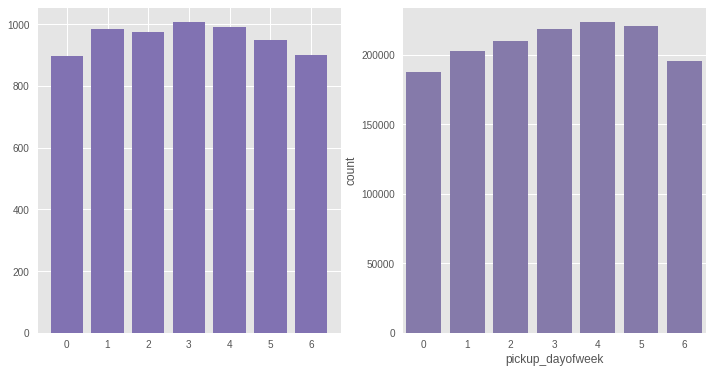

In [30]:
# dayofweek 字段
dayofweek_trip_duration = df_train.groupby(['pickup_dayofweek'])['trip_duration'].mean().reset_index()
plt.subplot(121)
plt.bar(dayofweek_trip_duration['pickup_dayofweek'], dayofweek_trip_duration['trip_duration'], color=color[3])
plt.subplot(122)
sns.countplot(df_train['pickup_dayofweek'], color=color[3])

周六周日乘车的数目和时间数最少, 可能个上班的人数减少有关.